In [1]:
%pylab inline
import numpy
import random
import matplotlib.pyplot as pl
from progress.bar import IncrementalBar

Populating the interactive namespace from numpy and matplotlib


In [2]:
class Hnn:
    def __init__(self, in_dim, max_iter):
        print('create hnn(%d, %d)' % (in_dim, max_iter))
        self.in_dim = in_dim 
        self.max_iter = max_iter

        self.cache = []
        self.width = in_dim ** 2

        self.weights = numpy.zeros((self.width, self.width), dtype=numpy.float32)
    
    def tr(self, i): 
        return i // self.in_dim, i % self.in_dim

    def chk(self, dat):
        for cached in self.cache:
            if numpy.array_equal(cached, dat):
                return True
        return False

    def fit(self, inp):
        self.cache.append(inp)
        for i in range(self.width):
            for j in range(self.width):
                if i != j:
                    x, y = self.tr(i)
                    m, n = self.tr(j)

                    self.weights[i, j] += inp[x, y] * inp[m, n]
                else:
                    self.weights[i, j] = 0 
    def pred(self, inp):
        total_iter, mis_iter, outp = 0, 0, inp.copy()
        while not self.chk(outp):
            total_iter += 1
            cur_idx = random.randint(0, self.width - 1)
            predw = 0 
            for i in range(self.width):
                x, y = self.tr(i)
                predw += outp[x, y] * self.weights[i, cur_idx]

            predw = 1 if predw > 0 else -1
            x, y = self.tr(cur_idx)
            if predw != outp[x, y]:
                outp[x, y] = predw
            mis_iter = 0 if predw != outp[x, y] else mis_iter + 1

            if mis_iter >= self.max_iter:
                return False, outp, total_iter
        return True, outp, total_iter

class Input:
    def __init__(self, label, data):
        self.label = label
        self.data = numpy.where(data == 0, -1, data)
        self.origin = data
        self.results = {}

    def fit(self, model):
        model.fit(self.data)

    def noised(self, level):
        out = self.data.copy()
        for x in range(out.shape[1]):
            for y in range(out.shape[0]):
                if random.randint(0, 100) <= level:
                    out[y][x] = self.data[y][x] * -1
        return out

    def process(self, model, bar):
        for level in range(0, 101, 5):
            bar.message = 'Running %s noise %3d...' % (self.label, level)
            image = self.noised(level)
            rec, out, it = model.pred(image)
            bar.next()
            self.results[level] = (rec, out, it)


In [3]:
bar = IncrementalBar('Running...', max=3 * 21)
model = Hnn(10, 1200)
a = Input("A", numpy.array([
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
]))
b = Input("И", numpy.array([
    [1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 1, 1, 1, 0, 1, 1],
    [1, 1, 0, 1, 1, 1, 0, 0, 1, 1],
    [1, 1, 1, 1, 1, 0, 0, 0, 1, 1],
    [1, 1, 1, 1, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
]))
c = Input("Р", numpy.array([
    [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 1, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
]))

a.fit(model)
b.fit(model)
c.fit(model)

create hnn(10, 1200)


0 True
5 True
10 True
15 True
20 True
25 True
30 True
35 True
40 True
45 True
50 True
55 False
60 False
65 False
70 False
75 False
80 False
85 False
90 False
95 False
100 False


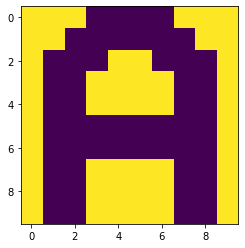

In [4]:
a.process(model, bar)
# b.process(model, bar)
# c.process(model, bar)

for idx, dat in enumerate(a.results.items()):
    level, res = dat
    imshow(res[1])
    print(level, res[0])
